In [1]:
# Basic Libraries
import time
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


try:
    #for MacBook users
    import os
    fileName = str(input("Please type the full path file name of t_worst.txt file")) 
    f = open(os.path.expanduser(fileName), "r")
    x = f.read()
    fileName = str(input("Please type the full path file name of t_best.txt file")) 
    f = open(os.path.expanduser(fileName), "r")
    y = f.read()
    fileName = str(input("Please type the full path file name of p_search.txt file")) 
    f = open(os.path.expanduser(fileName), "r")
    z = f.read()

except:
    #for Windows users
    f = open(fileName, "r")
    x = f.read()
    fileName = str(input("Please type the full path file name of t_best.txt file")) # must be in the same directory
    f = open(fileName, "r")
    y = f.read()
    fileName = str(input("Please type the full path file name of p_search.txt file")) # must be in the same directory
    f = open(fileName, "r")
    z = f.read()
    
finally:
    print("Thanks!")

Please type the full path file name of t_worst.txt file~/Downloads/t_worst.txt
Please type the full path file name of t_best.txt file~/Downloads/t_best.txt
Please type the full path file name of p_search.txt file~/Downloads/p_search.txt
Thanks!


In [2]:
#SSAHA
L=1
ssaha_x_time_taken = []
while L != 101:
    search = x
    i=1
    while i<L:
        search += x
        i += 1
    query = "TTTATACCTTCC"
        
    # ssaha algorithm (hash table)
    def ssahaFind(search, query): 

        #compute the lengths only once
        queryLen = len(query)
        searchLen = len(search)

        #This function converts the search string into a hash table.
        #The hash keys are all the possible base pairs.
        #The values stored are all the locations of every non-overlapping base pair in the search string.
        def make_hash(search):
            hash_dict = {} #the hash table will be stored here.
            hash_dict['AA']=[]
            hash_dict['AC']=[]
            hash_dict['AG']=[]
            hash_dict['AT']=[]
            hash_dict['AZ']=[]
            hash_dict['GA']=[]
            hash_dict['GG']=[]
            hash_dict['GC']=[]
            hash_dict['GT']=[]
            hash_dict['GZ']=[]
            hash_dict['TT']=[]
            hash_dict['TA']=[]
            hash_dict['TC']=[]
            hash_dict['TG']=[]
            hash_dict['TZ']=[]
            hash_dict['CC']=[]
            hash_dict['CG']=[]
            hash_dict['CT']=[]
            hash_dict['CA']=[]
            hash_dict['CZ']=[]
            hash_dict['ZZ']=[]
            hash_dict['ZA']=[]
            hash_dict['ZT']=[]
            hash_dict['ZG']=[]
            hash_dict['ZC']=[]
            for i in range(0, searchLen-1, 2): #separate the search string into non-overlapping base pairs and add into the hash table
                if (i == searchLen-1):
                    temp_key = search[i] + 'Z' #if searchLen is odd, append a non-ATGC base to prevent any match
                else:
                    temp_key = search[i] + search[i+1]
                hash_dict[temp_key].append(i) #We use closed address hashing
            return hash_dict

        #Search for the query base pairs using the hash table.
        def search_hash(hash_dict, query):
            #First, we extract all base pairs present in the query string (overlapping pairs are included)
            # and store them in the keys list.
            keys=[]
            for i in range(0,queryLen-1):
                k = query[i] + query[i+1]
                keys.append(k)

            #Next, we get the locations of each query key in the search string
            # and store them in the hits list along with their respective offsets.
            #The offset stores the location of the key with respect to the location of the query.
            #If the key found indicates the location of the query, the query would be found at
            # the key location minus the offset.
            hits=[]
            keys_size = len(keys)
            hits_size = 0
            for t in range(0,keys_size):
                h = hash_dict[keys[t]] #gets all the locations that key appears in search
                if (len(h) > 0):
                    hits.append([h,t]) #the index of hits is equal to t, the offset
                    hits_size += 1
            return hits,hits_size

        #Check if the locations in hits represent actual locations of the query.
        #Returns a list of query location if found.
        #If not found, returns -1.
        def getFinalLocations(hits, hits_size):
            consecutive = [] #locations where needsCons number of the same location is referenced by hits and its offsets
            consecutive2 = [] #locations where (needsCons-1) number of the same location is referenced by hits and its offsets
            needsCons = queryLen//2
            counts = [0] * searchLen #counts the number of times a location is referenced by hits and its offsets
            consecutiveLen = 0 #number of locations found in consecutive = number of locations deleted from consecutive2
            for item in hits:
                t = item[1] #the offset
                for h in item[0]:
                    counts[h-t] += 1 #h-t is the location of the first base of the query, if h indeed indicates the presence of the query
                    if (counts[h-t] == needsCons):
                        consecutive.append(h-t)
                        for c in range(0,len(consecutive2)): #h-t would have been included in consecutive2 already, so we need to remove it
                            if (consecutive2[c] == h-t):
                                consecutive2[c] = -1
                                consecutiveLen += 1
                    elif (counts[h-t] == needsCons-1):
                        consecutive2.append(h-t)

            foundQuery = []
            if (queryLen%2 == 0): #if even query length
                if (consecutiveLen > 0): #if no overlap
                    foundQuery.extend(consecutive) #these are all valid locations
                if (len(consecutive2)>(0+consecutiveLen)): #if overlap
                    for loc in consecutive2: #check the first and last bases in the query
                        if ((loc != -1) and (loc >= 0 and search[loc] == query[0]) and (loc <= (searchLen-queryLen) and search[loc+queryLen-1] == query[queryLen-1])):
                            foundQuery.append(loc)
                if (len(foundQuery) > 0): #query is found in the search string
                    return foundQuery
                else: #query does not exist in the search string
                    return -1
            else: #if odd query length
                #There are 2 cases - (1)overlooked first base of query, (2)overlooked last base of query
                for loc in consecutive: #check that first and last bases match
                    if (loc >= 0 and search[loc] == query[0]) and (loc <= (searchLen-queryLen) and search[loc+queryLen-1] == query[queryLen-1]):
                        foundQuery.append(loc)
                if (len(foundQuery) > 0): #query is found in the search string
                    return foundQuery
                else: #query does not exist in the search string
                    return -1

        # Measure time taken    
        start = time.perf_counter()
        hash_dict = make_hash(search)           #make the hash-table
        hits, hits_size = search_hash(hash_dict, query)    #find all query key locations in the search string
        x = getFinalLocations(hits,hits_size)
        stop = time.perf_counter()
        clock = stop-start
        ssaha_x_time_taken.append(1000*clock) 
        print(clock)

        return x

    ssahaFind(search, query)
    L+=1

print (ssaha_x_time_taken)

0.0011414369999975804
0.002085162000000196
0.0020717609999998388
0.003735291000001695
0.004573382999996767
0.00588311299999944
0.0044271580000021515
0.006300954000000303
0.004677458999999828
0.0047682980000018915
0.00654079599999946
0.0071583720000027995
0.007606237000000959
0.00863685899999922
0.00871182299999873
0.008203860000001839
0.010197735999998514
0.010765424999998885
0.018078763999998415
0.013335216000001537
0.02047442799999999
0.020969032
0.025017637000001258
0.02173003300000076
0.019052675000001074
0.0265818969999998
0.0228081049999993
0.02407369400000192
0.023515388999999942
0.027295786999999905
0.028781068000000687
0.026943181000000038
0.028756845000000197
0.031625723999997746
0.03029111499999715
0.03099130500000058
0.02818992299999934
0.037453650999999866
0.03278177400000004
0.032912996000000305
0.034107211999998555
0.04262463600000288
0.03583466799999968
0.03479385600000029
0.036551332000001935
0.04169123799999852
0.044896114999996684
0.05128274299999802
0.04582184499999

In [3]:
#SSAHA
L=1
ssaha_y_time_taken = []
while L != 101:
    search = y
    i=1
    while i<L:
        search += y
        i += 1
    query = "TTTATACCTTCC"
        
    # ssaha algorithm (hash table)
    def ssahaFind(search, query): 

        #compute the lengths only once
        queryLen = len(query)
        searchLen = len(search)

        #This function converts the search string into a hash table.
        #The hash keys are all the possible base pairs.
        #The values stored are all the locations of every non-overlapping base pair in the search string.
        def make_hash(search):
            hash_dict = {} #the hash table will be stored here.
            hash_dict['AA']=[]
            hash_dict['AC']=[]
            hash_dict['AG']=[]
            hash_dict['AT']=[]
            hash_dict['AZ']=[]
            hash_dict['GA']=[]
            hash_dict['GG']=[]
            hash_dict['GC']=[]
            hash_dict['GT']=[]
            hash_dict['GZ']=[]
            hash_dict['TT']=[]
            hash_dict['TA']=[]
            hash_dict['TC']=[]
            hash_dict['TG']=[]
            hash_dict['TZ']=[]
            hash_dict['CC']=[]
            hash_dict['CG']=[]
            hash_dict['CT']=[]
            hash_dict['CA']=[]
            hash_dict['CZ']=[]
            hash_dict['ZZ']=[]
            hash_dict['ZA']=[]
            hash_dict['ZT']=[]
            hash_dict['ZG']=[]
            hash_dict['ZC']=[]
            for i in range(0, searchLen-1, 2): #separate the search string into non-overlapping base pairs and add into the hash table
                if (i == searchLen-1):
                    temp_key = search[i] + 'Z' #if searchLen is odd, append a non-ATGC base to prevent any match
                else:
                    temp_key = search[i] + search[i+1]
                hash_dict[temp_key].append(i) #We use closed address hashing
            return hash_dict

        #Search for the query base pairs using the hash table.
        def search_hash(hash_dict, query):
            #First, we extract all base pairs present in the query string (overlapping pairs are included)
            # and store them in the keys list.
            keys=[]
            for i in range(0,queryLen-1):
                k = query[i] + query[i+1]
                keys.append(k)

            #Next, we get the locations of each query key in the search string
            # and store them in the hits list along with their respective offsets.
            #The offset stores the location of the key with respect to the location of the query.
            #If the key found indicates the location of the query, the query would be found at
            # the key location minus the offset.
            hits=[]
            keys_size = len(keys)
            hits_size = 0
            for t in range(0,keys_size):
                h = hash_dict[keys[t]] #gets all the locations that key appears in search
                if (len(h) > 0):
                    hits.append([h,t]) #the index of hits is equal to t, the offset
                    hits_size += 1
            return hits,hits_size

        #Check if the locations in hits represent actual locations of the query.
        #Returns a list of query location if found.
        #If not found, returns -1.
        def getFinalLocations(hits, hits_size):
            consecutive = [] #locations where needsCons number of the same location is referenced by hits and its offsets
            consecutive2 = [] #locations where (needsCons-1) number of the same location is referenced by hits and its offsets
            needsCons = queryLen//2
            counts = [0] * searchLen #counts the number of times a location is referenced by hits and its offsets
            consecutiveLen = 0 #number of locations found in consecutive = number of locations deleted from consecutive2
            for item in hits:
                t = item[1] #the offset
                for h in item[0]:
                    counts[h-t] += 1 #h-t is the location of the first base of the query, if h indeed indicates the presence of the query
                    if (counts[h-t] == needsCons):
                        consecutive.append(h-t)
                        for c in range(0,len(consecutive2)): #h-t would have been included in consecutive2 already, so we need to remove it
                            if (consecutive2[c] == h-t):
                                consecutive2[c] = -1
                                consecutiveLen += 1
                    elif (counts[h-t] == needsCons-1):
                        consecutive2.append(h-t)

            foundQuery = []
            if (queryLen%2 == 0): #if even query length
                if (consecutiveLen > 0): #if no overlap
                    foundQuery.extend(consecutive) #these are all valid locations
                if (len(consecutive2)>(0+consecutiveLen)): #if overlap
                    for loc in consecutive2: #check the first and last bases in the query
                        if ((loc != -1) and (loc >= 0 and search[loc] == query[0]) and (loc <= (searchLen-queryLen) and search[loc+queryLen-1] == query[queryLen-1])):
                            foundQuery.append(loc)
                if (len(foundQuery) > 0): #query is found in the search string
                    return foundQuery
                else: #query does not exist in the search string
                    return -1
            else: #if odd query length
                #There are 2 cases - (1)overlooked first base of query, (2)overlooked last base of query
                for loc in consecutive: #check that first and last bases match
                    if (loc >= 0 and search[loc] == query[0]) and (loc <= (searchLen-queryLen) and search[loc+queryLen-1] == query[queryLen-1]):
                        foundQuery.append(loc)
                if (len(foundQuery) > 0): #query is found in the search string
                    return foundQuery
                else: #query does not exist in the search string
                    return -1

        # Measure time taken    
        start = time.perf_counter()
        hash_dict = make_hash(search)           #make the hash-table
        hits, hits_size = search_hash(hash_dict, query)    #find all query key locations in the search string
        x = getFinalLocations(hits,hits_size)
        stop = time.perf_counter()
        clock = stop-start
        ssaha_y_time_taken.append(1000*clock) 
        print(clock)

        return x
        
    ssahaFind(search, query)
    L+=1

print (ssaha_y_time_taken)

0.0001906550000043694
0.000396665000003793
0.0007013479999997685
0.001368140000003848
0.0010105039999999121
0.001455178999997031
0.0014314140000024622
0.002080302000003087
0.0020064959999999132
0.003276040000002922
0.004774864999994577
0.003484172000000285
0.0022308199999940825
0.0031505130000013537
0.003983213999994462
0.0031052819999999315
0.004660780000001807
0.003912479000000246
0.003947035999999571
0.003944740000001445
0.003958212000000572
0.004299719999998786
0.004002702000001079
0.004237498000001949
0.004418593000004023
0.004472417999998868
0.004702281000000141
0.004947078999997245
0.005144192000003045
0.005402447000001587
0.005496959999994999
0.005517373000003545
0.006084149999999511
0.006514348999999697
0.017132222000000752
0.016211319999996476
0.010875299999995036
0.008435194000000479
0.008616139000004353
0.008754854999999395
0.009173103999998489
0.012485731999994698
0.009183088000000339
0.016618236999995872
0.013599665000000982
0.017650504999998873
0.02161117699999693
0.0145

In [4]:
#SSAHA
L=1
ssaha_z_time_taken = []
while L != 101:
    search = z
    i=1
    while i<L:
        search += z
        i += 1
    query = "TTTATACCTTCC"
        
    # ssaha algorithm (hash table)
    def ssahaFind(search, query): 

        #compute the lengths only once
        queryLen = len(query)
        searchLen = len(search)

        #This function converts the search string into a hash table.
        #The hash keys are all the possible base pairs.
        #The values stored are all the locations of every non-overlapping base pair in the search string.
        def make_hash(search):
            hash_dict = {} #the hash table will be stored here.
            hash_dict['AA']=[]
            hash_dict['AC']=[]
            hash_dict['AG']=[]
            hash_dict['AT']=[]
            hash_dict['AZ']=[]
            hash_dict['GA']=[]
            hash_dict['GG']=[]
            hash_dict['GC']=[]
            hash_dict['GT']=[]
            hash_dict['GZ']=[]
            hash_dict['TT']=[]
            hash_dict['TA']=[]
            hash_dict['TC']=[]
            hash_dict['TG']=[]
            hash_dict['TZ']=[]
            hash_dict['CC']=[]
            hash_dict['CG']=[]
            hash_dict['CT']=[]
            hash_dict['CA']=[]
            hash_dict['CZ']=[]
            hash_dict['ZZ']=[]
            hash_dict['ZA']=[]
            hash_dict['ZT']=[]
            hash_dict['ZG']=[]
            hash_dict['ZC']=[]
            for i in range(0, searchLen-1, 2): #separate the search string into non-overlapping base pairs and add into the hash table
                if (i == searchLen-1):
                    temp_key = search[i] + 'Z' #if searchLen is odd, append a non-ATGC base to prevent any match
                else:
                    temp_key = search[i] + search[i+1]
                hash_dict[temp_key].append(i) #We use closed address hashing
            return hash_dict

        
        #Search for the query base pairs using the hash table.
        def search_hash(hash_dict, query):
            #First, we extract all base pairs present in the query string (overlapping pairs are included)
            # and store them in the keys list.
            keys=[]
            for i in range(0,queryLen-1):
                k = query[i] + query[i+1]
                keys.append(k)

            #Next, we get the locations of each query key in the search string
            # and store them in the hits list along with their respective offsets.
            #The offset stores the location of the key with respect to the location of the query.
            #If the key found indicates the location of the query, the query would be found at
            # the key location minus the offset.
            hits=[]
            keys_size = len(keys)
            hits_size = 0
            for t in range(0,keys_size):
                h = hash_dict[keys[t]] #gets all the locations that key appears in search
                if (len(h) > 0):
                    hits.append([h,t]) #the index of hits is equal to t, the offset
                    hits_size += 1
            return hits,hits_size

        #Check if the locations in hits represent actual locations of the query.
        #Returns a list of query location if found.
        #If not found, returns -1.
        def getFinalLocations(hits, hits_size):
            consecutive = [] #locations where needsCons number of the same location is referenced by hits and its offsets
            consecutive2 = [] #locations where (needsCons-1) number of the same location is referenced by hits and its offsets
            needsCons = queryLen//2
            counts = [0] * searchLen #counts the number of times a location is referenced by hits and its offsets
            consecutiveLen = 0 #number of locations found in consecutive = number of locations deleted from consecutive2
            for item in hits:
                t = item[1] #the offset
                for h in item[0]:
                    counts[h-t] += 1 #h-t is the location of the first base of the query, if h indeed indicates the presence of the query
                    if (counts[h-t] == needsCons):
                        consecutive.append(h-t)
                        for c in range(0,len(consecutive2)): #h-t would have been included in consecutive2 already, so we need to remove it
                            if (consecutive2[c] == h-t):
                                consecutive2[c] = -1
                                consecutiveLen += 1
                    elif (counts[h-t] == needsCons-1):
                        consecutive2.append(h-t)

            foundQuery = []
            if (queryLen%2 == 0): #if even query length
                if (consecutiveLen > 0): #if no overlap
                    foundQuery.extend(consecutive) #these are all valid locations
                if (len(consecutive2)>(0+consecutiveLen)): #if overlap
                    for loc in consecutive2: #check the first and last bases in the query
                        if ((loc != -1) and (loc >= 0 and search[loc] == query[0]) and (loc <= (searchLen-queryLen) and search[loc+queryLen-1] == query[queryLen-1])):
                            foundQuery.append(loc)
                if (len(foundQuery) > 0): #query is found in the search string
                    return foundQuery
                else: #query does not exist in the search string
                    return -1
            else: #if odd query length
                #There are 2 cases - (1)overlooked first base of query, (2)overlooked last base of query
                for loc in consecutive: #check that first and last bases match
                    if (loc >= 0 and search[loc] == query[0]) and (loc <= (searchLen-queryLen) and search[loc+queryLen-1] == query[queryLen-1]):
                        foundQuery.append(loc)
                if (len(foundQuery) > 0): #query is found in the search string
                    return foundQuery
                else: #query does not exist in the search string
                    return -1

        # Measure time taken    
        start = time.perf_counter()
        hash_dict = make_hash(search)           #make the hash-table
        hits, hits_size = search_hash(hash_dict, query)    #find all query key locations in the search string
        x = getFinalLocations(hits,hits_size)
        stop = time.perf_counter()
        clock = stop-start
        ssaha_z_time_taken.append(1000*clock) 
        print(clock)

        return x

    ssahaFind(search, query)
    L+=1

print (ssaha_z_time_taken)

0.0007041810000032456
0.0008761829999954784
0.0010487950000026558
0.002556774000005646
0.0030078929999959314
0.00365686099999607
0.0021804779999996526
0.002847547999998312
0.0023494190000050708
0.0054365710000041645
0.003507915000000139
0.008736367999993888
0.004956059000001289
0.0053070079999955055
0.004353778999998781
0.004257307999999682
0.004832201999995789
0.004958860000002119
0.005026751999999135
0.005559873999999354
0.0058492950000044175
0.006793875999996146
0.008305413999998734
0.013199186999997892
0.016606980999995358
0.00995615800000138
0.01039297399999839
0.008820776999996838
0.009353838000002668
0.009831122000001358
0.012373529000001326
0.00902155699999696
0.009251581000000897
0.009588704999998754
0.014155076999998073
0.010869691999999986
0.012575451000003568
0.010562444000001392
0.012211196000002644
0.013652299999996842
0.013160593000002052
0.015426051999995138
0.022565826999993988
0.02841490699999838
0.027909656999995036
0.027130396999993422
0.025817325999994978
0.0301553

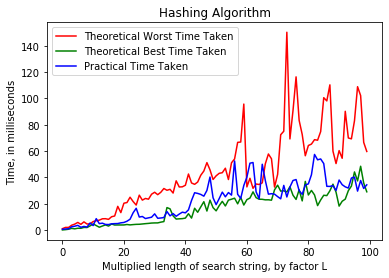

In [5]:
# Plot experiment results

theoretical_search_worst = np.array(ssaha_x_time_taken)
theoretical_search_best = np.array(ssaha_y_time_taken)
practical_search = np.array(ssaha_z_time_taken)

plt.xlabel('Multiplied length of search string, by factor L')
plt.ylabel('Time, in milliseconds')
plt.plot(np.arange(0,100, dtype = int), theoretical_search_worst, 'r-', label = 'Theoretical Worst Time Taken')
plt.plot(np.arange(0,100, dtype = int), theoretical_search_best, 'g-', label = 'Theoretical Best Time Taken')
plt.plot(np.arange(0,100, dtype = int), practical_search, 'b-', label = 'Practical Time Taken')
plt.title('Hashing Algorithm')
plt.legend()